# Final Project Kelompok Alpha

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
airbnb = pd.read_csv("airbnb.csv")

### 1. Gambaran besar

In [4]:
# 10 Host Termahal
airbnb.sort_values(by=['price'], ascending=False).head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,NaN,12,146
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,NaN,1,364


In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### 2. Data Properties

#### a.Type

In [ ]:
airbnb.dtypes

#### b. Missing Value

In [ ]:
airbnb.isnull().sum()

#### c. Tampilan data

In [ ]:
airbnb.head()

In [ ]:
airbnb.tail()

#### d. Data summary

In [ ]:
airbnb.info()

In [ ]:
48895-10052

In [ ]:
airbnb.describe(include='all')

In [ ]:
airbnb.shape

#### e. Shape data

In [9]:
airbnb.shape

(48895, 16)

### 3. Jumlah data, mean, median, dan standar deviasi.

In [ ]:
data3 = airbnb.describe(include='all')
data3 = data3.iloc[[0, 4, 3, 5]]
data3

### 4. Harga maksimal dan harga minimal

In [ ]:
max_price = airbnb['price'].max()
min_price = airbnb['price'].min()
print('Harga maksimal = ', max_price)
print('Harga minimal = ', min_price)

### 5. Selesaikan masalah missing value

#### Mencari missing value

In [ ]:
airbnb.isna().sum()

#### Isi missing value pada kolom 'last_review' dengan data yang paling banyak muncul

In [ ]:
airbnb['last_review'] = airbnb['last_review'].fillna(airbnb['last_review'].mode()[0])

In [ ]:
airbnb['last_review'].isnull().any()

#### Isi missing value pada kolom 'reviews_per_month' dengan mean

In [ ]:
airbnb['reviews_per_month'].fillna(airbnb['reviews_per_month'].mean(), inplace=True)

In [ ]:
airbnb['reviews_per_month'].isnull().any()

#### Drop 'name' and 'host_name'
Ini dilakukan karena jumlahnya hanya sedikit sehingga tidak akan berpengaruh signifikan terhadap data.

In [ ]:
airbnb.isnull().sum()

In [ ]:
airbnb.dropna(axis=0, how='any', inplace=True)

In [ ]:
airbnb.isnull().sum()

In [ ]:
airbnb.isna().any()

### 6. Kategori berdasarkan Price: Cheap, Medium, Expensive
Cheap <= 4000,
Medium >= 4000,
Expensive >= 7000

In [13]:
airbnb['price'].max()

10000

In [14]:
airbnb['price'].min()

0

In [15]:
airbnb['price_category'] = np.where(airbnb['price'] > 7000, 'Expensive', 
                                    np.where(airbnb['price'] >= 4000, 
                                             'Medium', 'Cheap'))

In [16]:
airbnb['price_category'].value_counts()

Cheap        48860
Medium          24
Expensive       11
Name: price_category, dtype: int64

In [17]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### 7. Filter semua data yang memiliki 'last_review' di > 2019

In [18]:
filter_last_review = airbnb.loc[airbnb['last_review'] > '2019']

In [19]:
# Tersusun dari yang paling terbaru
filter_last_review = filter_last_review.sort_values(by=['last_review'], ascending=False)

In [20]:
filter_last_review['last_review']

48852    2019-07-08
44287    2019-07-08
30161    2019-07-08
47562    2019-07-08
47070    2019-07-08
            ...    
36631    2019-01-01
39047    2019-01-01
32279    2019-01-01
39055    2019-01-01
37389    2019-01-01
Name: last_review, Length: 25209, dtype: object

### 8. Visualisasikan 'price' untuk membandingkan harga kamar yang tersedia

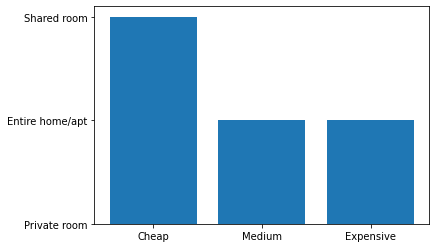

Text(0.5, 1.0, 'a')

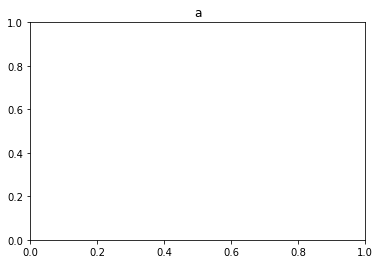

In [22]:
plt.bar(airbnb['price_category'], airbnb['room_type'])
plt.show()
plt.title('a')

Text(0, 0.5, 'Harga (USD)')

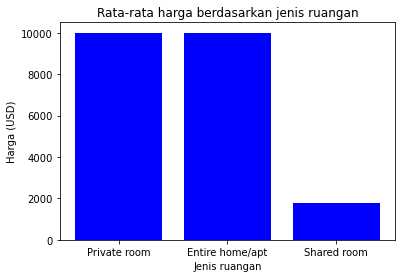

In [23]:
plt.bar(airbnb['room_type'], airbnb['price'], color='b')
plt.title('Rata-rata harga berdasarkan jenis ruangan')
plt.xlabel('Jenis ruangan')
plt.ylabel("Harga (USD)")

In [24]:
airbnb['price_category'].value_counts()

Cheap        48860
Medium          24
Expensive       11
Name: price_category, dtype: int64

In [25]:
airbnb.groupby(('neighbourhood_group')['price'].agg(['average_price']))

<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
<ipython-input-25-7cba2fac9cf2>:1: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
  airbnb.groupby(('neighbourhood_group')['price'].agg(['average_price']))


TypeError: string indices must be integers

In [ ]:
plt.bar()